In [1]:
# Numpy basics

In [1]:
import numpy as np

In [20]:
np.zeros(2)

array([0., 0.])

In [3]:
p = np.zeros([2,3])
p

array([[0., 0., 0.],
       [0., 0., 0.]])

In [10]:
p[0,1] = 7.
p[1,2] = 14.

In [11]:
p

array([[ 0.,  7.,  0.],
       [ 0.,  0., 14.]])

In [12]:
p = 1. + 2*p
p

array([[ 1., 15.,  1.],
       [ 1.,  1., 29.]])

In [13]:
q = p # changes in both p and q
q[0,0] = 42.
p

array([[42., 15.,  1.],
       [ 1.,  1., 29.]])

In [14]:
q

array([[42., 15.,  1.],
       [ 1.,  1., 29.]])

In [17]:
q = p.copy() 
q[0,2] = 45. #changes only q and not p
p

array([[42., 15.,  1.],
       [ 1.,  1., 29.]])

In [18]:
q

array([[42., 15., 45.],
       [ 1.,  1., 29.]])

In [19]:
# QUIZ
# 
# Fill in the for loop below to set 
# the x, y1, and y2 arrays to the 
# following values:
#
# - The x array should contain 
#   num_points many points evenly 
#   spaced between 0 and 2*pi.
#   0 and 2*pi should be included.
#
# - The y1 array should contain 
#   the corresponding sine values 
#   of the values in the x array.
#
# - The y2 array should contain 
#   the corresponding cosine values
#   of the values in the x array.

In [5]:
import math
import matplotlib.pyplot as plt
%matplotlib inline

* Newton’s Second Law of Motion
    * F = m * a
* Rate of change of velocity is goven by accelration, a(t) = $\frac{d^{2}x}{dt^{2}}$ = $\frac{dv}{dt}$ = $\frac{F}{m}$
* Rate of change of position is given by velocity, v(t) = $\frac{dx}{dt}$       

* Forward Euler:

* Solve these equations by walking in small steps
    - h = small time interval
    - x(0) and v(0) which are position and velocity at time, t=0
    - new position, x(h) = x(0) + h * v(0)
        - If intial velocity is 2m/s and we wait for 3 seconds, our position will change by
          6 meters.
    - new veloctiy, v(h) = v(0) + h * $\frac{F}{m}$
    
    - Similary, the position of the body after 2h can be expressed by
      x(2h) = x(h) + h * v(h) and v(2h) = v(h) + h * $\frac{F}{m}$

* Newton’s Law of Gravitation:
    - Force of attraction between two bodies can be expressed as
    - F = G * $\frac{m_{1}*m_{2}}{d^{2}}$ where G = Gravitation constant
    
* Gravitation on spacecraft as vectors
    - $F^{->}_{S}$ = $m_{S}a_{S}^{->}$ = G * $\frac{m_{E}*m_{S}}{d^{2}_{ES}}$ + G * $\frac{m_{M}*m_{S}}{d^{2}_{MS}}$
    
* System of Differential Equations
    - Properties 
        - Order = 2
        - Non-linear
    - $a_{S}^{->}$ = $\frac{dv_{s}^{->}}{dt}$ = $\frac{d^{2}x_{s}^{->}}{dt^{2}}$ = 
      G * ${m_{E}}$ * $\frac{-x_{s}^{->}}{||x_{s}^{->}||^{3}}$ + 
      G * ${m_{M}}$ * $\frac{x_{M}^{->}-x_{s}^{->}}{||x_{M}^{->}-x_{s}^{->}||^{3}}$

$\frac{d_{2}x}{dt_{2}}$

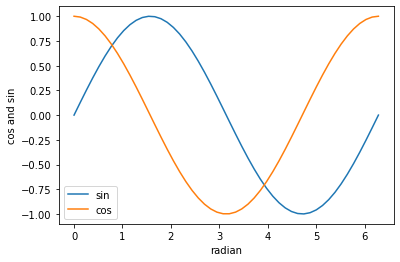

In [18]:
def sin_cos():
    '''
    1. Convert angles into radians
    2. Pass these radians into sin() and cos() arguments
    3. Store the output in an array
    
    Return : list of radians as array x, sin() of each value in x, cos() of each value in x
    '''
    number_of_points = 50
    
    x = np.zeros(number_of_points)
    sin_x = np.zeros(number_of_points)
    cos_x = np.zeros(number_of_points)
    
    for i in range(number_of_points):
        x[i] = 2. * math.pi * (i / (number_of_points - 1.)) # angle in radians
        # x[i] should be between 0 and 2π
        sin_x[i] = math.sin(x[i])
        cos_x[i] = math.cos(x[i])
    
    #print((np.max(x)-np.min(x))/3.14) - 2π
    #print((x*180)/np.pi) # converting radians into angles
    return x, sin_x, cos_x

x, sin_x, cos_x = sin_cos()

def plot_me():
    plt.plot(x, sin_x, label = 'sin')
    plt.plot(x, cos_x, label = 'cos')
    plt.xlabel('radian')
    plt.ylabel('cos and sin')
    plt.legend()
# Call the function plot_me()
plot_me()

In [98]:
np.zeros([3+1,2])

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [57]:
# Forward Euler

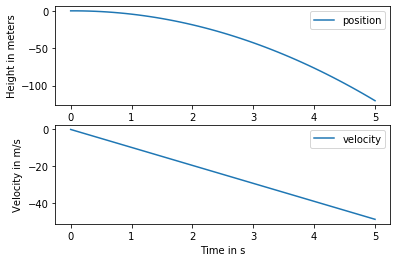

In [26]:
# Free falling body

def forward_Euler():
    delta_T = 0.1 # Time interval or h
    g = - 9.81 # Acceleration is -ve because of gravitational pull towards the Earth
    
    number_of_points = 50
    
    # Initialize an array for t,x and v of 51 points starting from 0.
    t = np.zeros(number_of_points + 1) 
    x = np.zeros(number_of_points + 1) 
    v = np.zeros(number_of_points + 1) 
    
    for i in range(number_of_points):
        t[i + 1] = delta_T * (i + 1) #small steps of time ---> 0,0.1,0.2,0.3 ........ 
        x[i + 1] = x[i] + delta_T * v[i] #The next value of x should have the previous value of x + delta_T * v
        v[i + 1] = v[i] + delta_T * g #The next value of v should have the previous value of v + delta_T * g
    
    return t, x, v

t, x, v = forward_Euler()

#print(t)
#print(x)
#print(v)

def plot_me():
    axes_height = plt.subplot(211)
    plt.plot(t, x, label='position') # Height decreases evetually as body reached toward the surface of the Earth
    axes_velocity = plt.subplot(212)
    plt.plot(t, v, label='velocity') # Velocity increases in the negative direction
    axes_height.set_ylabel('Height in meters')
    axes_velocity.set_ylabel('Velocity in m/s')
    axes_velocity.set_xlabel('Time in s')
    axes_height.legend()
    axes_velocity.legend()
    plt.show() 
    
plot_me()

In [27]:
#### np.zeros(51)

Technically, the net volume of water flowing through the (imaginary) surface per time is called "flux". Flux is a pure number (a "scalar", as physicists say) and is associated with a surface.

The velocity vector field is the corresponding "flux density": the volume of water flowing through an infinitesimally small area perpendicular to the velocity, per time and per area (so it's an area density, not a spatial density). The flux density is a vector field, that is: It assigns one vector each to all points of a region in space.

To keep all students confused, "flux density" is often called "flux".

Not only volume can flow; the same concept applies to mass, charge, energy, and heat, with appropriate changes to the measurement units of flux and flux density.

In [93]:
# QUIZ
#
# Modify the acceleration function so that it returns 
# the acceleration vector of the spacecraft.
#
# A sample of how to use the numpy.linalg.norm function
# is given. This computes the length of the vector, and 
# it should be the only outside function you need to 
# use in your answer.

# The origin, or (0,0), is at the center of the earth 
# in this example, so it doesn't make any sense to 
# set either the moon_position or spaceship_position
# equal to (0,0). Depending on your solution, doing this
# may throw an error!  Please note that moon_position and 
# spaceship_position are both numpy arrays, and the 
# returned value should also be a numpy array.

In [94]:
# Nonlinear ODE with order 2
import numpy

earth_mass = 5.97e24 # kg
moon_mass = 7.35e22 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(moon_position, spaceship_position): #acceleration of aircraft
    '''
    Input arguments: position of spacecraft as x,y coordinates in 2-D
        - moon_position: [x.,y.]
        - spaceship_position: [x.,y.]
        - earth_position: [0.,0.]
    Ouput : acceleration in x,y directions of the spacecraft
    '''
    vector_to_moon = moon_position - spaceship_position
    vector_to_earth = spaceship_position # earth_position = [0.,0.]
    return (gravitational_constant * ( earth_mass * vector_to_earth / numpy.linalg.norm(vector_to_earth)**3)
            +  gravitational_constant * ( moon_mass * vector_to_moon / numpy.linalg.norm(vector_to_moon)**3))                 


In [97]:
# Position of moon : [x,y] = np.array([1.0,2.0])
# Position of earth : [x,y] = np.array([4.0,5.0])
acceleration(np.array([1.0,2.0]),np.array([4.0,5.0]))

array([5.87455853e+12, 7.39134477e+12])

Screenshot 2020-04-14 at 17.48.53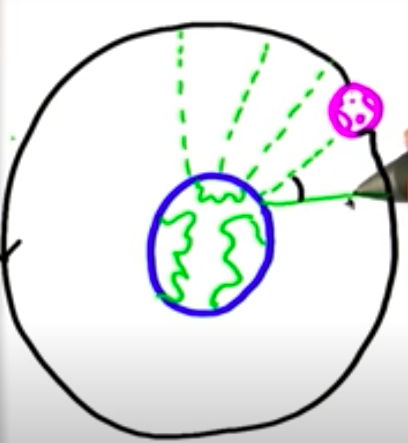

In [6]:
# The orbit function below to model one revolution of the moon around the earth, assuming that the orbit is circular.
moon_distance = 384e6 #in meters

# Linear function
def orbit():
    number_of_points = 50 # we have 50 coordinates
    x = np.zeros([number_of_points+1,2]) #initialize the coordinates with [0,0]
    print(x)
    for i in range(number_of_points+1):
        angle_in_radians = 2 * math.pi * (i/(number_of_points))
        #print(angle_in_radians)
        x[i,0] = moon_distance * math.cos(angle_in_radians)
        x[i,1] = moon_distance * math.sin(angle_in_radians)
    
    return x

x = orbit()
#print(x)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


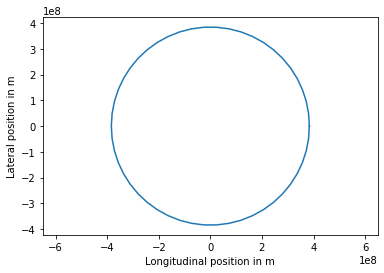

In [114]:
def plot_me():
    plt.axis('equal')
    plt.plot(x[:, 0], x[:, 1])
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')

plot_me()

In [115]:
# PROBLEM 2
#
# Modify the trajectory function below to 
# plot the trajectory of several particles. 
# Each trajectory starts at the point (0,0) 
# given initial speed in the direction 
# specified by the angle. Use the Forward 
# Euler Method to accomplish this.


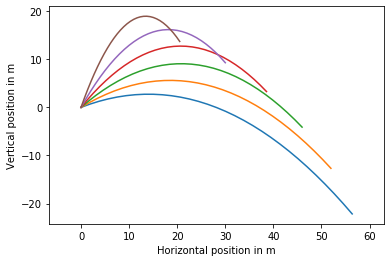

In [29]:
import math

h = 0.1 # time is seconds
g = 9.81 # acceleration in m / s2

acceleration = np.array([0., -g]) # horizontal component is always assumed to be 0
initial_speed = 20. # m / s

def trajectory():
    angles = np.linspace(20., 70., 6)

    num_steps = 30
    x = np.zeros([num_steps + 1, 2])
    v = np.zeros([num_steps + 1, 2])

    for angle in angles: #for each angle, plot tragectories with #coordinates = 30
        angle_in_radian = (math.pi * angle )/ 180.
        x[0,0] = 0. #initial x-coordinate for position
        x[0,1] = 0. #initial y-coordinate for position
        v[0,0] = initial_speed * math.cos(angle_in_radian) #initial x-coordinate for velocity
        v[0,1] = initial_speed * math.sin(angle_in_radian) #initial y-coordinate for velocity
        for i in range(num_steps):
            x[i+1] = x[i] + h * v[i]
            v[i+1] = v[i] + h * acceleration
        #print(v)
        plt.plot(x[:, 0], x[:, 1])
        plt.axis('equal')
        axes = plt.gca()
        axes.set_xlabel('Horizontal position in m')
        axes.set_ylabel('Vertical position in m')
    return x, v

x, v = trajectory()

In [116]:
numpy.array([0., -9.18])

array([ 0.  , -9.18])

In [117]:
numpy.linspace(20., 50., 6)

array([20., 26., 32., 38., 44., 50.])

In [122]:
numpy.zeros([3,2])

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [146]:
# PROBLEM 3
#
# Modify the below functions acceleration and 
# ship_trajectory to plot the trajectory of a 
# spacecraft with the given initial position 
# and velocity. Use the Forward Euler Method 
# to accomplish this.

In [184]:
# Case I : h=1.0 and num_steps = 13000
# Case II : h=1.0 and num_steps = 1300000
# Case III : h=1.0 and num_steps = 1300000
# Case IV : h=0.1 and num_steps = 130000

h = 0.1 # s
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position): #wrt the Earth while ignoring the force by the moon
    vector_to_earth = - spaceship_position #earth is at origin
    return (gravitational_constant *  (earth_mass * vector_to_earth)) / numpy.linalg.norm(vector_to_earth)**3                

def ship_trajectory():
    num_steps = 130000
    x = numpy.zeros([num_steps + 1, 2]) # m
    v = numpy.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = 15e6
    x[0, 1] = 1e6
    v[0, 0] = 2e3
    v[0, 1] = 4e3
    
    for i in range(num_steps):
        x[i+1] = x[i] + h * v[i]
        v[i+1] = v[i] + h * acceleration(x[i])

    return x, v

x, v = ship_trajectory()

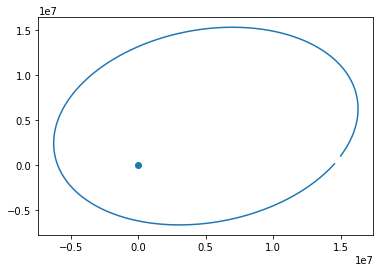

In [185]:
def plot_me():
    plt.plot(x[:, 0], x[:, 1])
    plt.scatter(0, 0)
    #plt.axis('equal')
    #axes = plt.gca()
    #axes.set_xlabel('Longitudinal position in m')
    #axes.set_ylabel('Lateral position in m')
plot_me()

In [ ]:
# QUIZ
#
# Determine the step size h so that after 
# num_points the time total_times has passed.
# Compute the trajectory of the spacecraft 
# starting from a point a distance r from 
# the origin with a velocity of magnitude 
# equal to the speed. Use the Forward Euler 
# Method. Return the distance between the final 
# and the initial position in the variable 
# error.
# finding the error introduced in our simulation

60322124.10557166
28541175.533778083
15139715.94725672
7797806.7170453705
3174848.297933943
1596773.4997540994


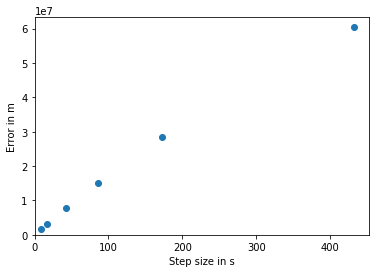

In [36]:
# These are used to keep track of the data we want to plot
h_array = []
error_array = []

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

def acceleration(spaceship_position): # wrt the Earth
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth)**3 * vector_to_earth

def calculate_error(num_steps):
    ###Your code here.
    h = total_time / num_steps
    x = np.zeros([num_steps+1,2])
    v = np.zeros([num_steps+1,2])
    
    x[0,0] = radius # horizontal component
    v[0,1] = speed  # vertical component
    
    for i in range(num_steps):
        x[i+1] = x[i] + h * v[i]
        v[i+1] = v[i] + h* acceleration(x[i])
        
    # print(v)
    # print(x)
    error = np.linalg.norm(x[-1]-x[0]) # ||last coordinate - first coordinate||^2
    #print(error)
    # This is used for plotting
    h_array.append(h)
    error_array.append(error)
    return error
    
h_array=[]
error_array=[]
for num_steps in [200, 500, 1000, 2000, 5000, 10000]:
    error = calculate_error(num_steps)

def plot_me():
    axes = plt.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    plt.scatter(h_array, error_array)
    plt.xlim(xmin = 0.)
    plt.ylim(ymin = 0.)

plot_me()



In [37]:
# Heun's Method - advanced Euler Method

In [49]:
# QUIZ
#
# Implement Heun's Method in the function below, 
# building off of the Forward Euler method as a 
# base. The resulting diagram will show the 
# errors in comparison.

import math

total_time = 24. * 3600. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2
radius = (gravitational_constant * earth_mass * total_time**2. / 4. / math.pi ** 2.) ** (1. / 3.)
speed = 2.0 * math.pi * radius / total_time

# These are used to keep track of the data we want to plot
h_array = []
euler_error_array = []
heuns_error_array = []

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth)**3 * vector_to_earth

def heuns_method(num_steps):
    ###Original Euler Method
    h = total_time / num_steps

    x = np.zeros([num_steps + 1, 2]) # m
    v = np.zeros([num_steps + 1, 2]) # m / s

    x[0, 0] = radius
    v[0, 1] = speed

    for step in range(num_steps):
        x[step + 1] = x[step] + h * v[step]
        v[step + 1] = v[step] + h * acceleration(x[step])

    error = np.linalg.norm(x[-1] - x[0])
    h_array.append(h)
    euler_error_array.append(error)
    ###End Original Euler Method

    ###Heun's Method
    for step in range(num_steps):
        initial_acceleration = acceleration(x[step])
        x_E = x[step] + h * v[step]
        #print(initial_acceleration)
        #print(x_E)
        v_E = v[step] + h * initial_acceleration
        x[step + 1] = x[step] + h * 0.5 * (v[step] + v_E)
        v[step + 1] = v[step] + h * 0.5 * (initial_acceleration + acceleration(v_E))
        
    error = np.linalg.norm(x[-1] - x[0])
    heuns_error_array.append(error)

    ###End Heun's Method

    return x, v, error

for num_steps in [50, 100, 200, 500, 1000]:
    x, v, error = heuns_method(num_steps) #Check x, v, error


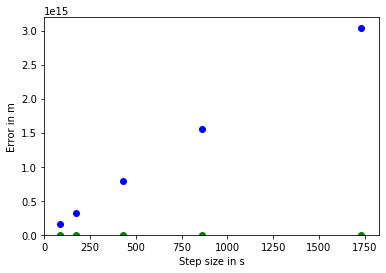

In [52]:

def plot_me():
    plt.scatter(h_array, euler_error_array, c = 'g')
    plt.scatter(h_array, heuns_error_array, c = 'b')
    plt.xlim(xmin = 0.)
    plt.ylim(ymin = 0.)
    axes = plt.gca()
    axes.set_xlabel('Step size in s')
    axes.set_ylabel('Error in m')
    
plot_me()

In [53]:
# Adaptive step size 

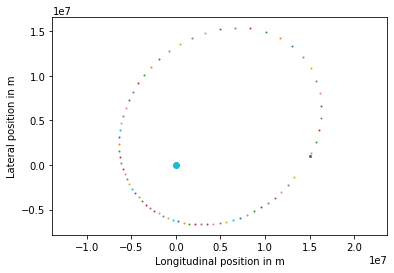

In [57]:
# QUIZ
#
# Implement adaptive step size in the 
# below function.

import math

total_time = 12500. # s
g = 9.81 # m / s2
earth_mass = 5.97e24 # kg
gravitational_constant = 6.67e-11 # N m2 / kg2

def acceleration(spaceship_position):
    vector_to_earth = - spaceship_position # earth located at origin
    return gravitational_constant * earth_mass / np.linalg.norm(vector_to_earth)**3 * vector_to_earth

def orbit():
    x = np.zeros(2) # m
    v = np.zeros(2) # m / s
    x[0] = 15e6
    x[1] = 1e6    
    v[0] = 2e3
    v[1] = 4e3
    plt.scatter(x[0], x[1], s = 4)

    current_time = 0. # s
    h = 100. # s
    h_new = h # s, will store the adaptive step size of the next step
    tolerance = 5e5 # m

    while current_time < total_time:
        acceleration0 = acceleration(x)    
        xE = x + h * v
        vE = v + h * acceleration0
        xH = x + h * 0.5 * (v + vE)
        vH = v + h * 0.5 * (acceleration0 + acceleration(xE))
        x = xH
        v = vH

        ###Your code here.
        error = np.linalg.norm(xE - xH) + total_time * np.linalg.norm(vE - vH)
        h_new = h * math.sqrt(tolerance/error + math.exp(-50)) # Safe : tolerance/(error + e-50)
        
        plt.scatter(x[0], x[1], s = 1)
        current_time += h
        h = h_new
    plt.axis('equal')
    plt.scatter(0., 0.) 
    axes = plt.gca()
    axes.set_xlabel('Longitudinal position in m')
    axes.set_ylabel('Lateral position in m')
    return x, v

x, v = orbit()

In [58]:
math.exp(-50)

1.9287498479639178e-22